#  Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Dataset

In [30]:
weather = pd.read_csv('Weather Data.csv')
weather

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# EDA

In [31]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [32]:
weather.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [33]:
weather.shape

(8784, 8)

In [34]:
list(weather.columns)

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Weather']

In [35]:
weather.index

RangeIndex(start=0, stop=8784, step=1)

In [36]:
weather.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [37]:
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'], format='%m/%d/%Y %H:%M')

In [38]:
weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [39]:
weather.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

In [40]:
weather.insert(loc=1, column='Day_of_Week', value=weather['Date/Time'].dt.day_name())

In [41]:
weather.head()

,Date/Time,Day_of_Week,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,Sunday,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,Sunday,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,Sunday,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,Sunday,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,Sunday,-1.5,-3.3,88,7,4.8,101.23,Fog


In [42]:
weather.describe().round(2).rename({'50%': 'median'})

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00
mean,8.80,2.56,67.43,14.95,27.66,101.05
std,11.69,10.88,16.92,8.69,12.62,0.84
min,-23.30,-28.50,18.00,0.00,0.20,97.52
25%,0.10,-5.90,56.00,9.00,24.10,100.56
median,9.30,3.30,68.00,13.00,25.00,101.07
75%,18.80,11.80,81.00,20.00,25.00,101.59
max,33.00,24.40,100.00,83.00,48.30,103.65


In [43]:
weather[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].skew()

Temp_C             -0.177666
Dew Point Temp_C   -0.318433
Rel Hum_%          -0.323830
Wind Speed_km/h     0.871374
Visibility_km       0.413362
Press_kPa          -0.229925
dtype: float64

**From previous Statistics, we can see that all data is normally distributed (fairly symmetric curve) because their skewness is between [-0.5, 0.5] except Wind Speed_km/h column, it's moderate positive/right skewed because its skewness is larger than 0.5**

**Let's do some histogram plots to be sure**

array([[<AxesSubplot:title={'center':'Temp_C'}>,
        <AxesSubplot:title={'center':'Dew Point Temp_C'}>],
       [<AxesSubplot:title={'center':'Rel Hum_%'}>,
        <AxesSubplot:title={'center':'Wind Speed_km/h'}>],
       [<AxesSubplot:title={'center':'Visibility_km'}>,
        <AxesSubplot:title={'center':'Press_kPa'}>]], dtype=object)

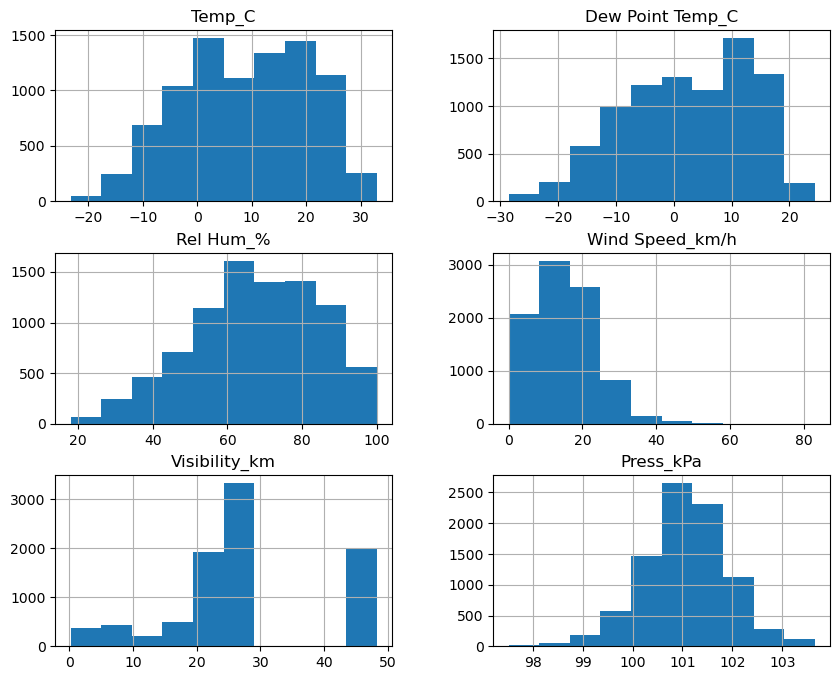

In [44]:
weather[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].hist(figsize=(10, 8), bins=10)

**As we see may be there are some outliers in Visibilty_km column we. will see later in notebook in box plots**

In [45]:
weather['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [46]:
weather['Weather'].nunique()

50

**There is 50 Class in weather column**

In [47]:
weather.nunique()

Date/Time           8784
Day_of_Week            7
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [48]:
weather['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [49]:
weather.isnull().sum()

Date/Time           0
Day_of_Week         0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

**Our data is clean, there aren't any null values.**

In [50]:
weather.groupby('Weather').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


###### quick look in relations between columns

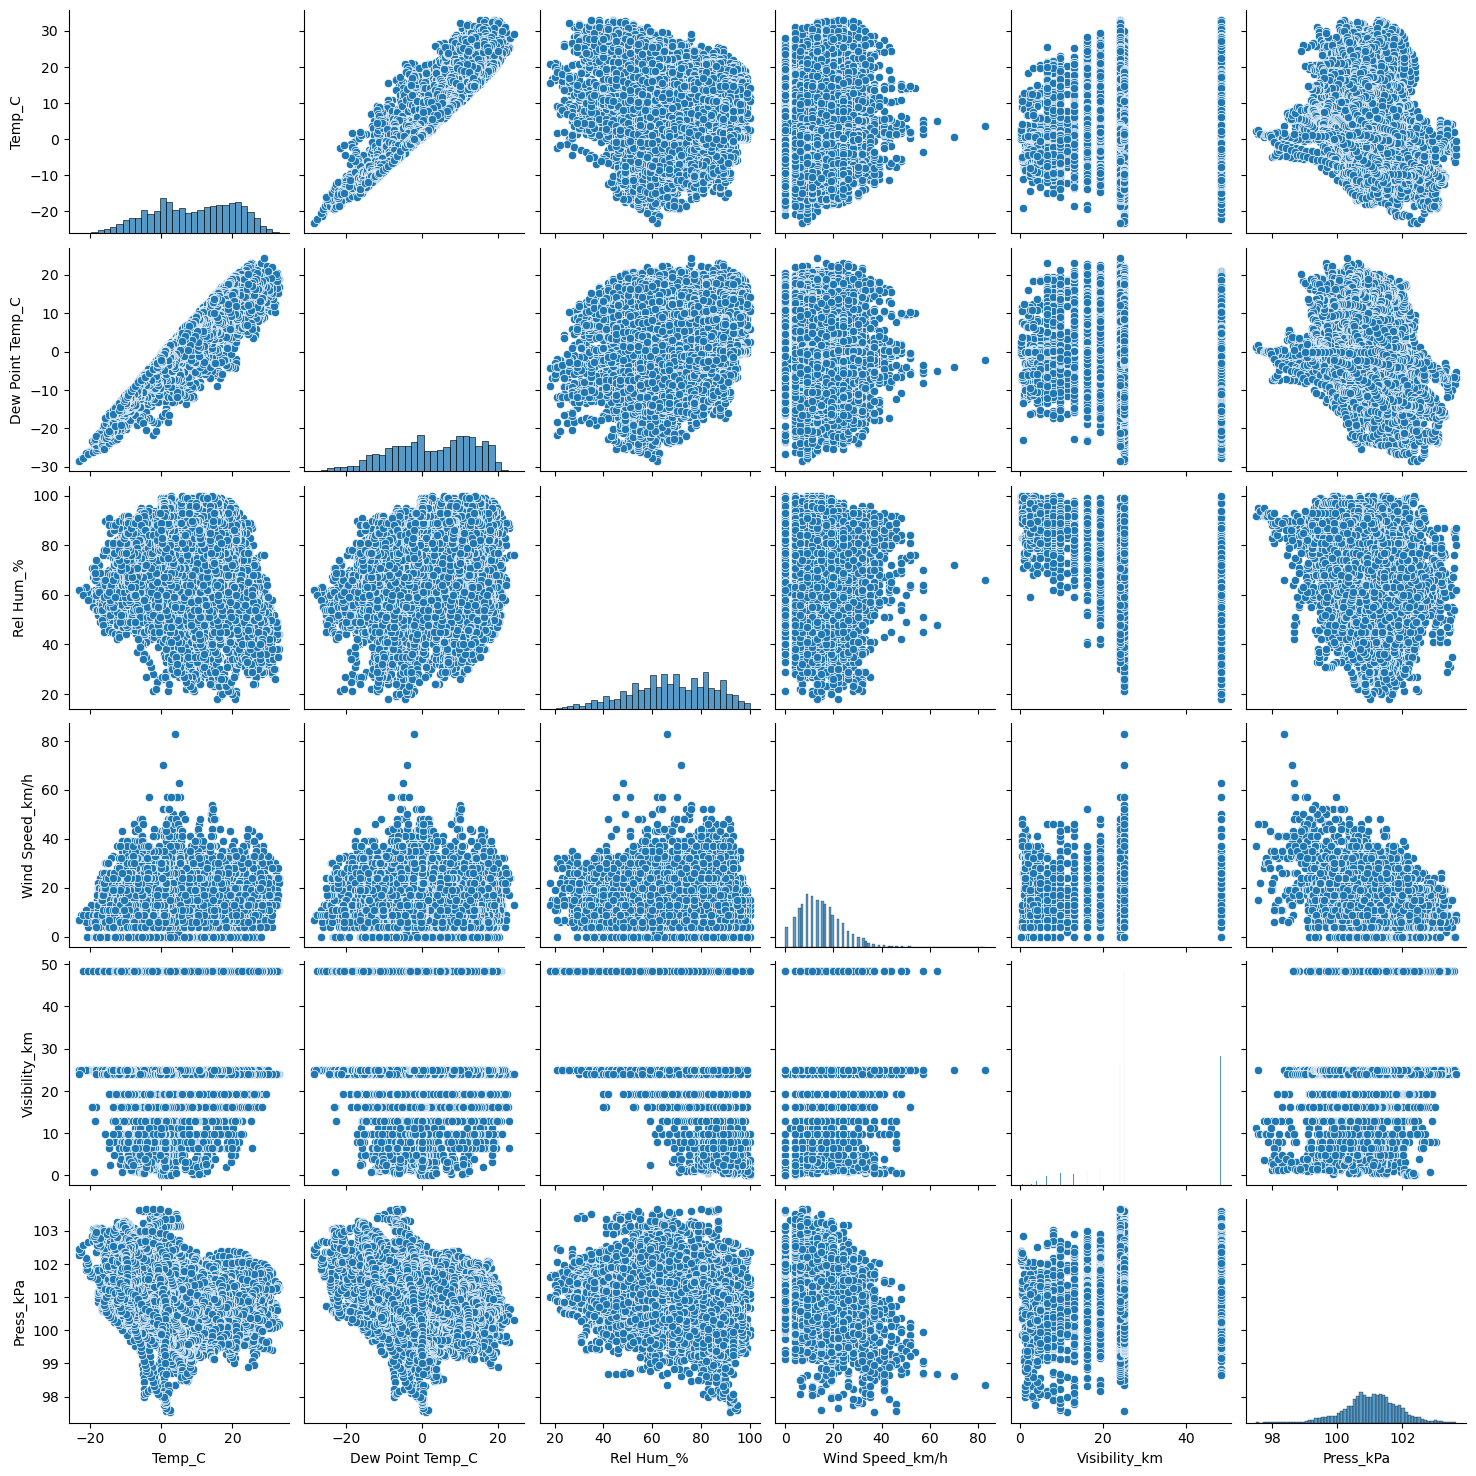

In [51]:
sns.pairplot(data=weather)

<AxesSubplot:>

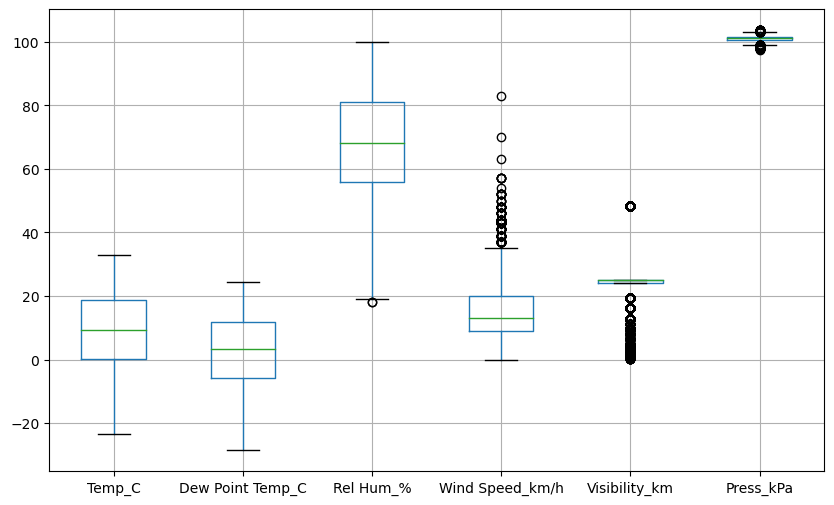

In [52]:
weather.boxplot(figsize=(10, 6))

<AxesSubplot:>

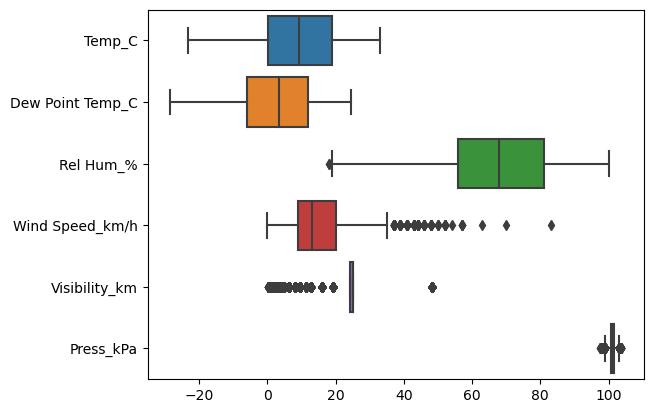

In [74]:
sns.boxplot(data=weather, orient='h')

**There are many outliers in (windspeed, Visibilty) columns.**

In [59]:
weather_values_counts = weather['Weather'].value_counts()
weather_values_counts

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

Text(0, 0.5, 'Weather Condition')

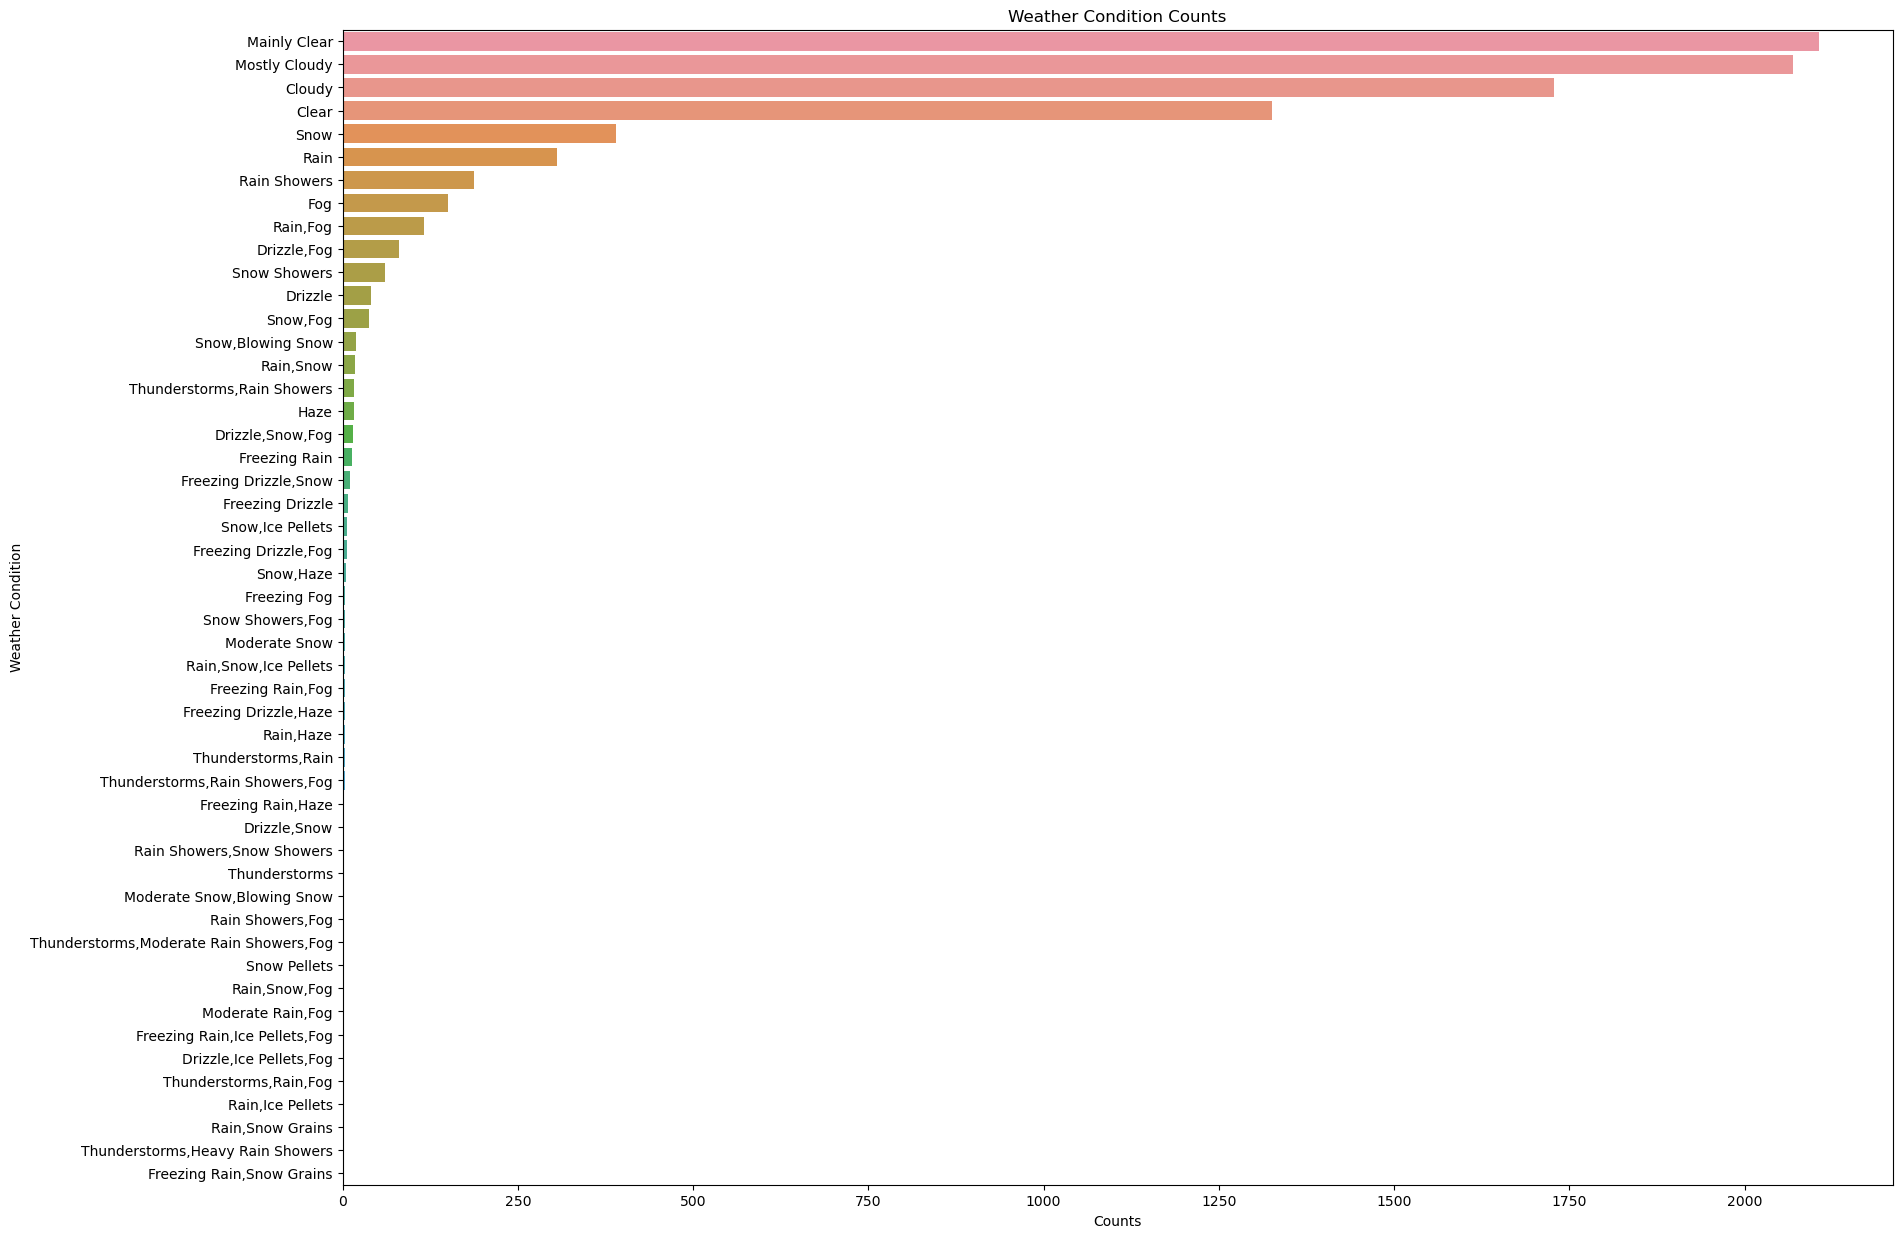

In [54]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(data=weather, y=weather_values_counts.index, x=weather_values_counts.values, orient='h')
ax.set_title('Weather Condition Counts')
ax.set_xlabel('Counts')
ax.set_ylabel('Weather Condition')

Text(0.5, 1.0, 'Correlations Between Numerical Columns')

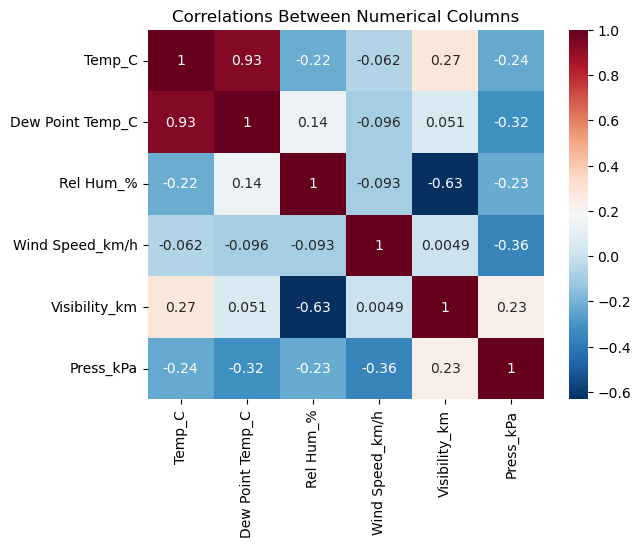

In [55]:
sns.heatmap(data=weather.corr(), annot=True, cmap='RdBu_r')
plt.title('Correlations Between Numerical Columns')

**We can see that Temp and Dew Point Temp columns are strong positive correlated**

<AxesSubplot:xlabel='Temp_C', ylabel='Dew Point Temp_C'>

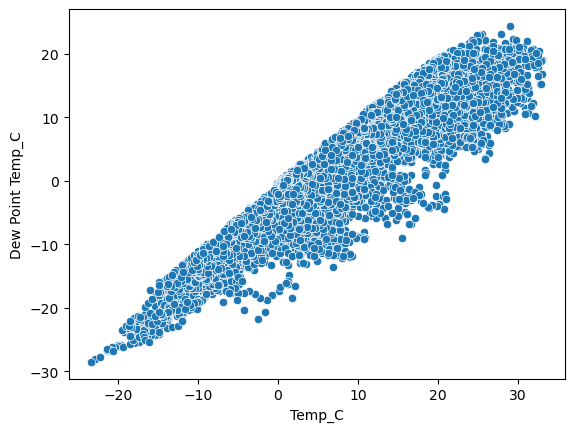

In [56]:
sns.scatterplot(data=weather, x='Temp_C', y='Dew Point Temp_C')

Text(0.5, 1.0, 'Weather Condition by Temp Range')

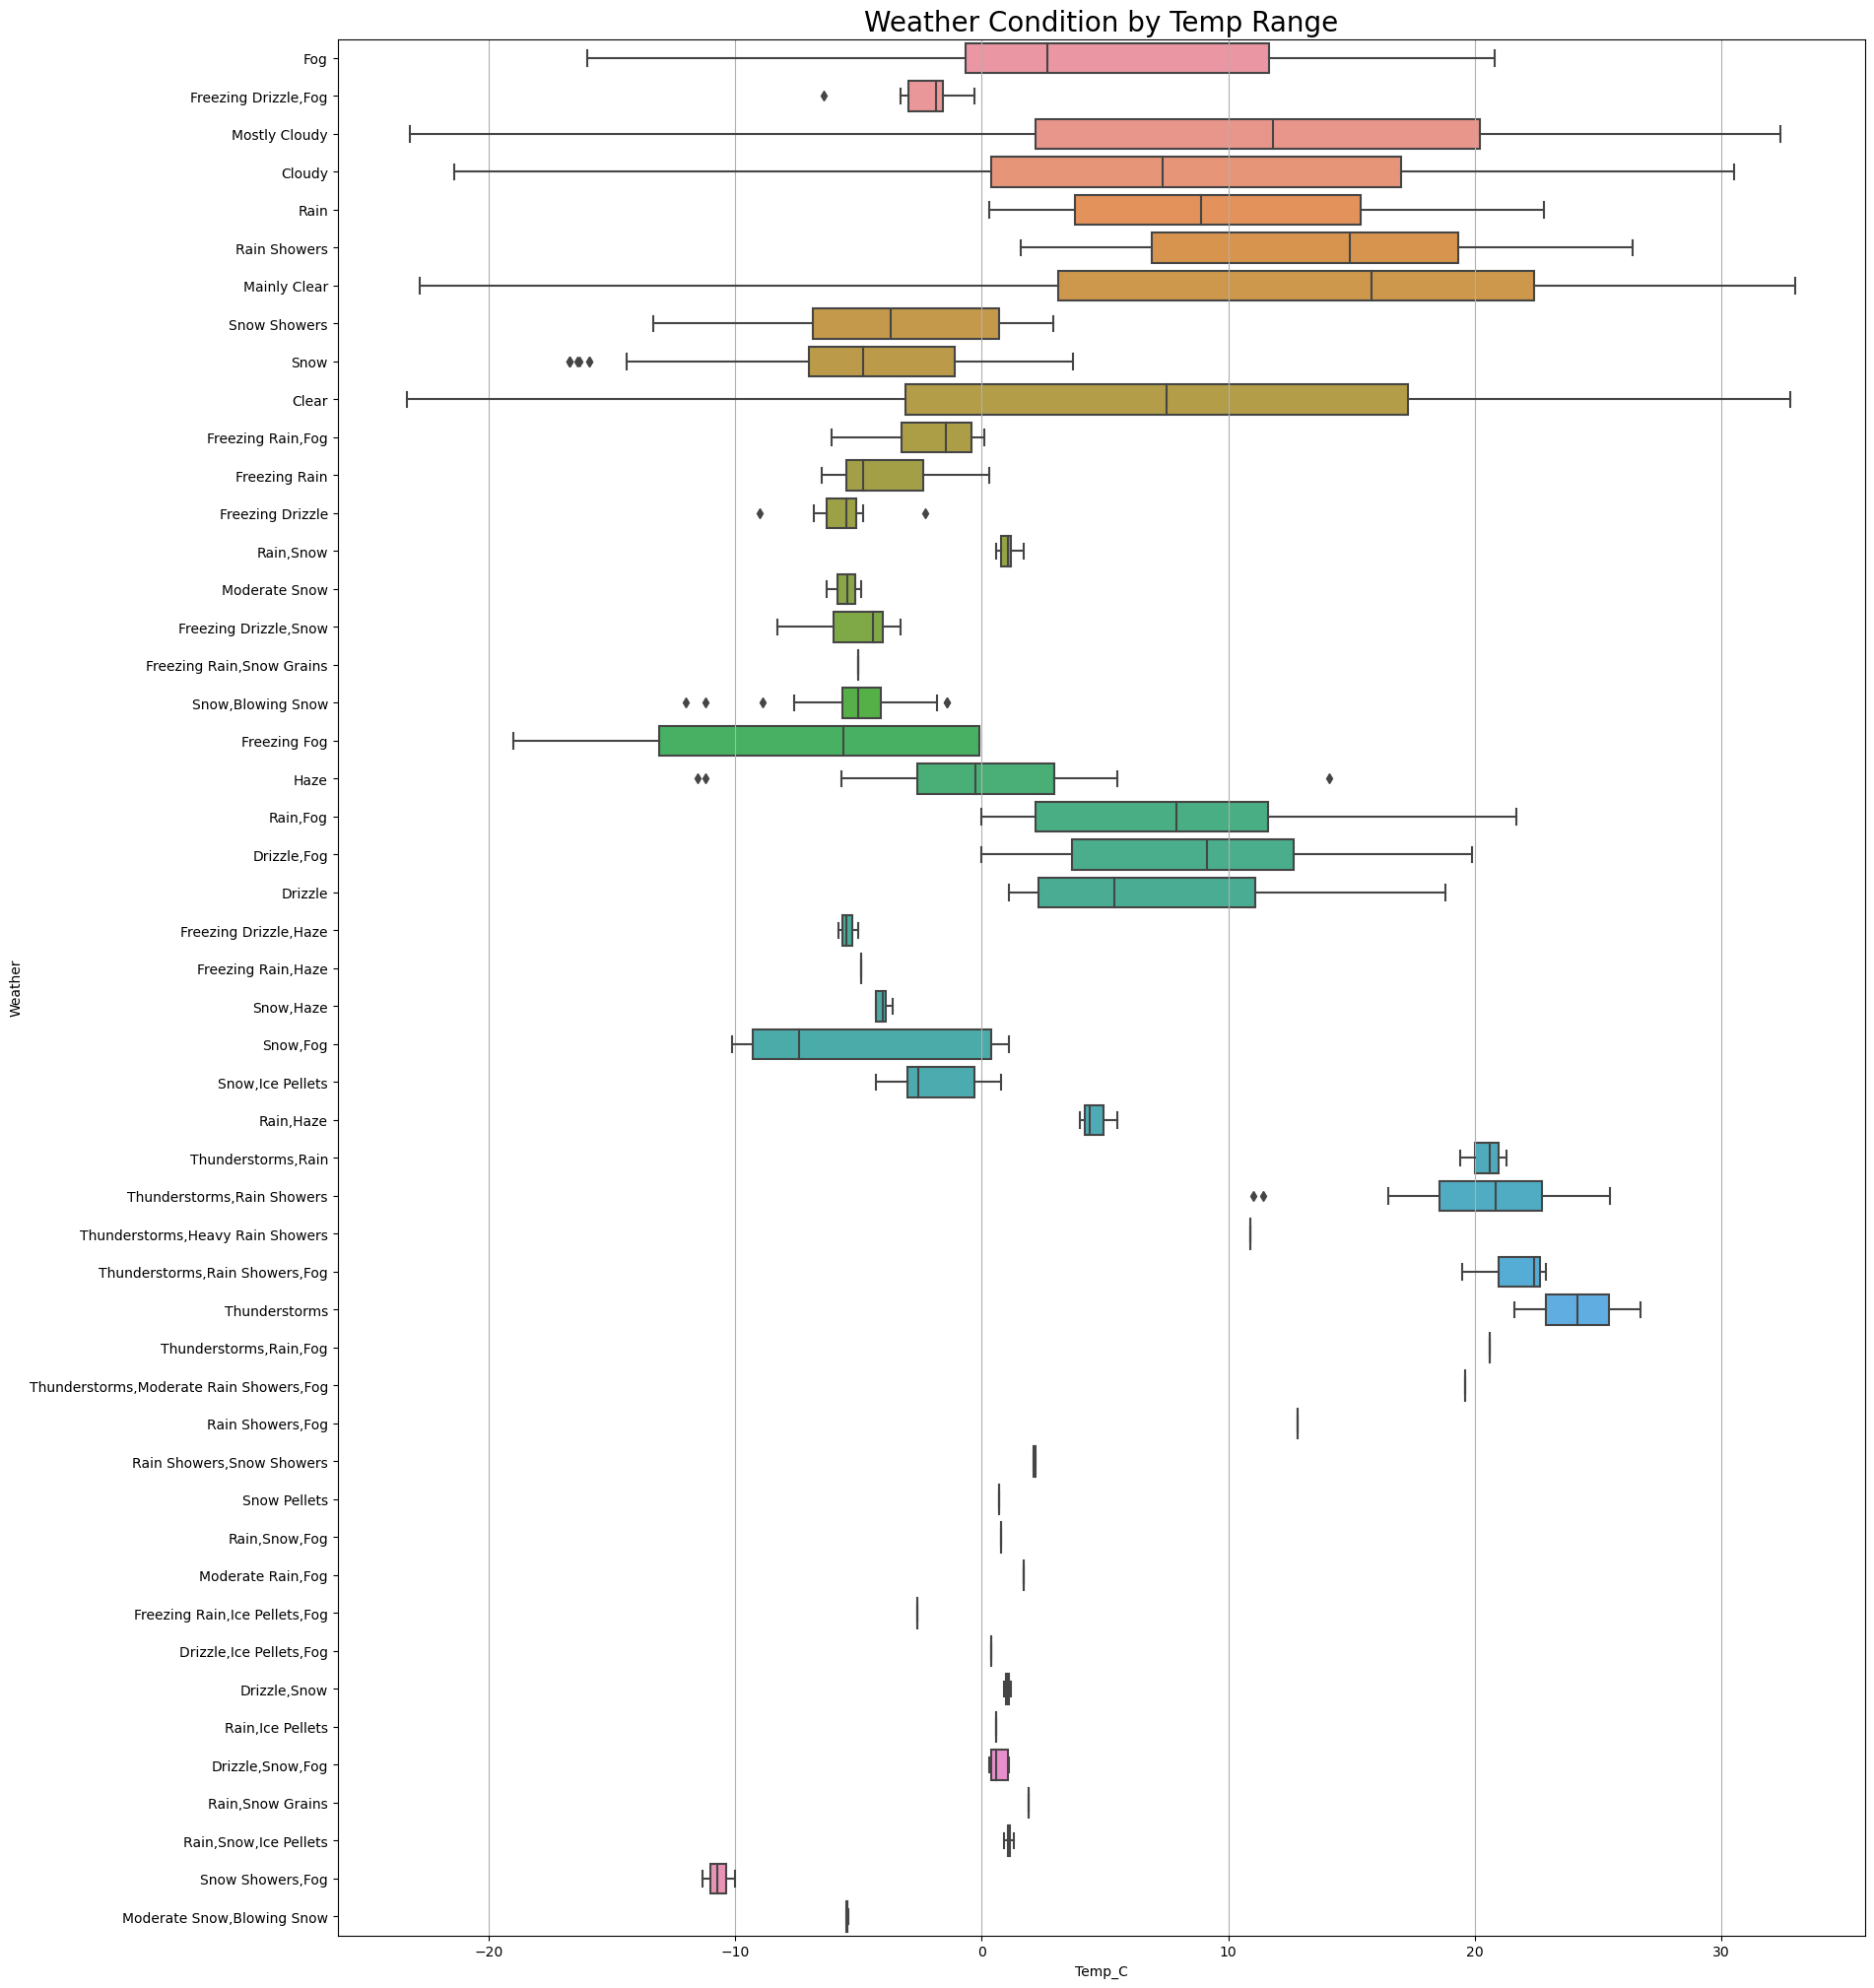

In [76]:
plt.figure(figsize=(20, 25))
plt.grid(True)
sns.boxplot(data=weather, x='Temp_C', y='Weather')
plt.title('Weather Condition by Temp Range', fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Weather Condition by Dew Point Temp_C Range')

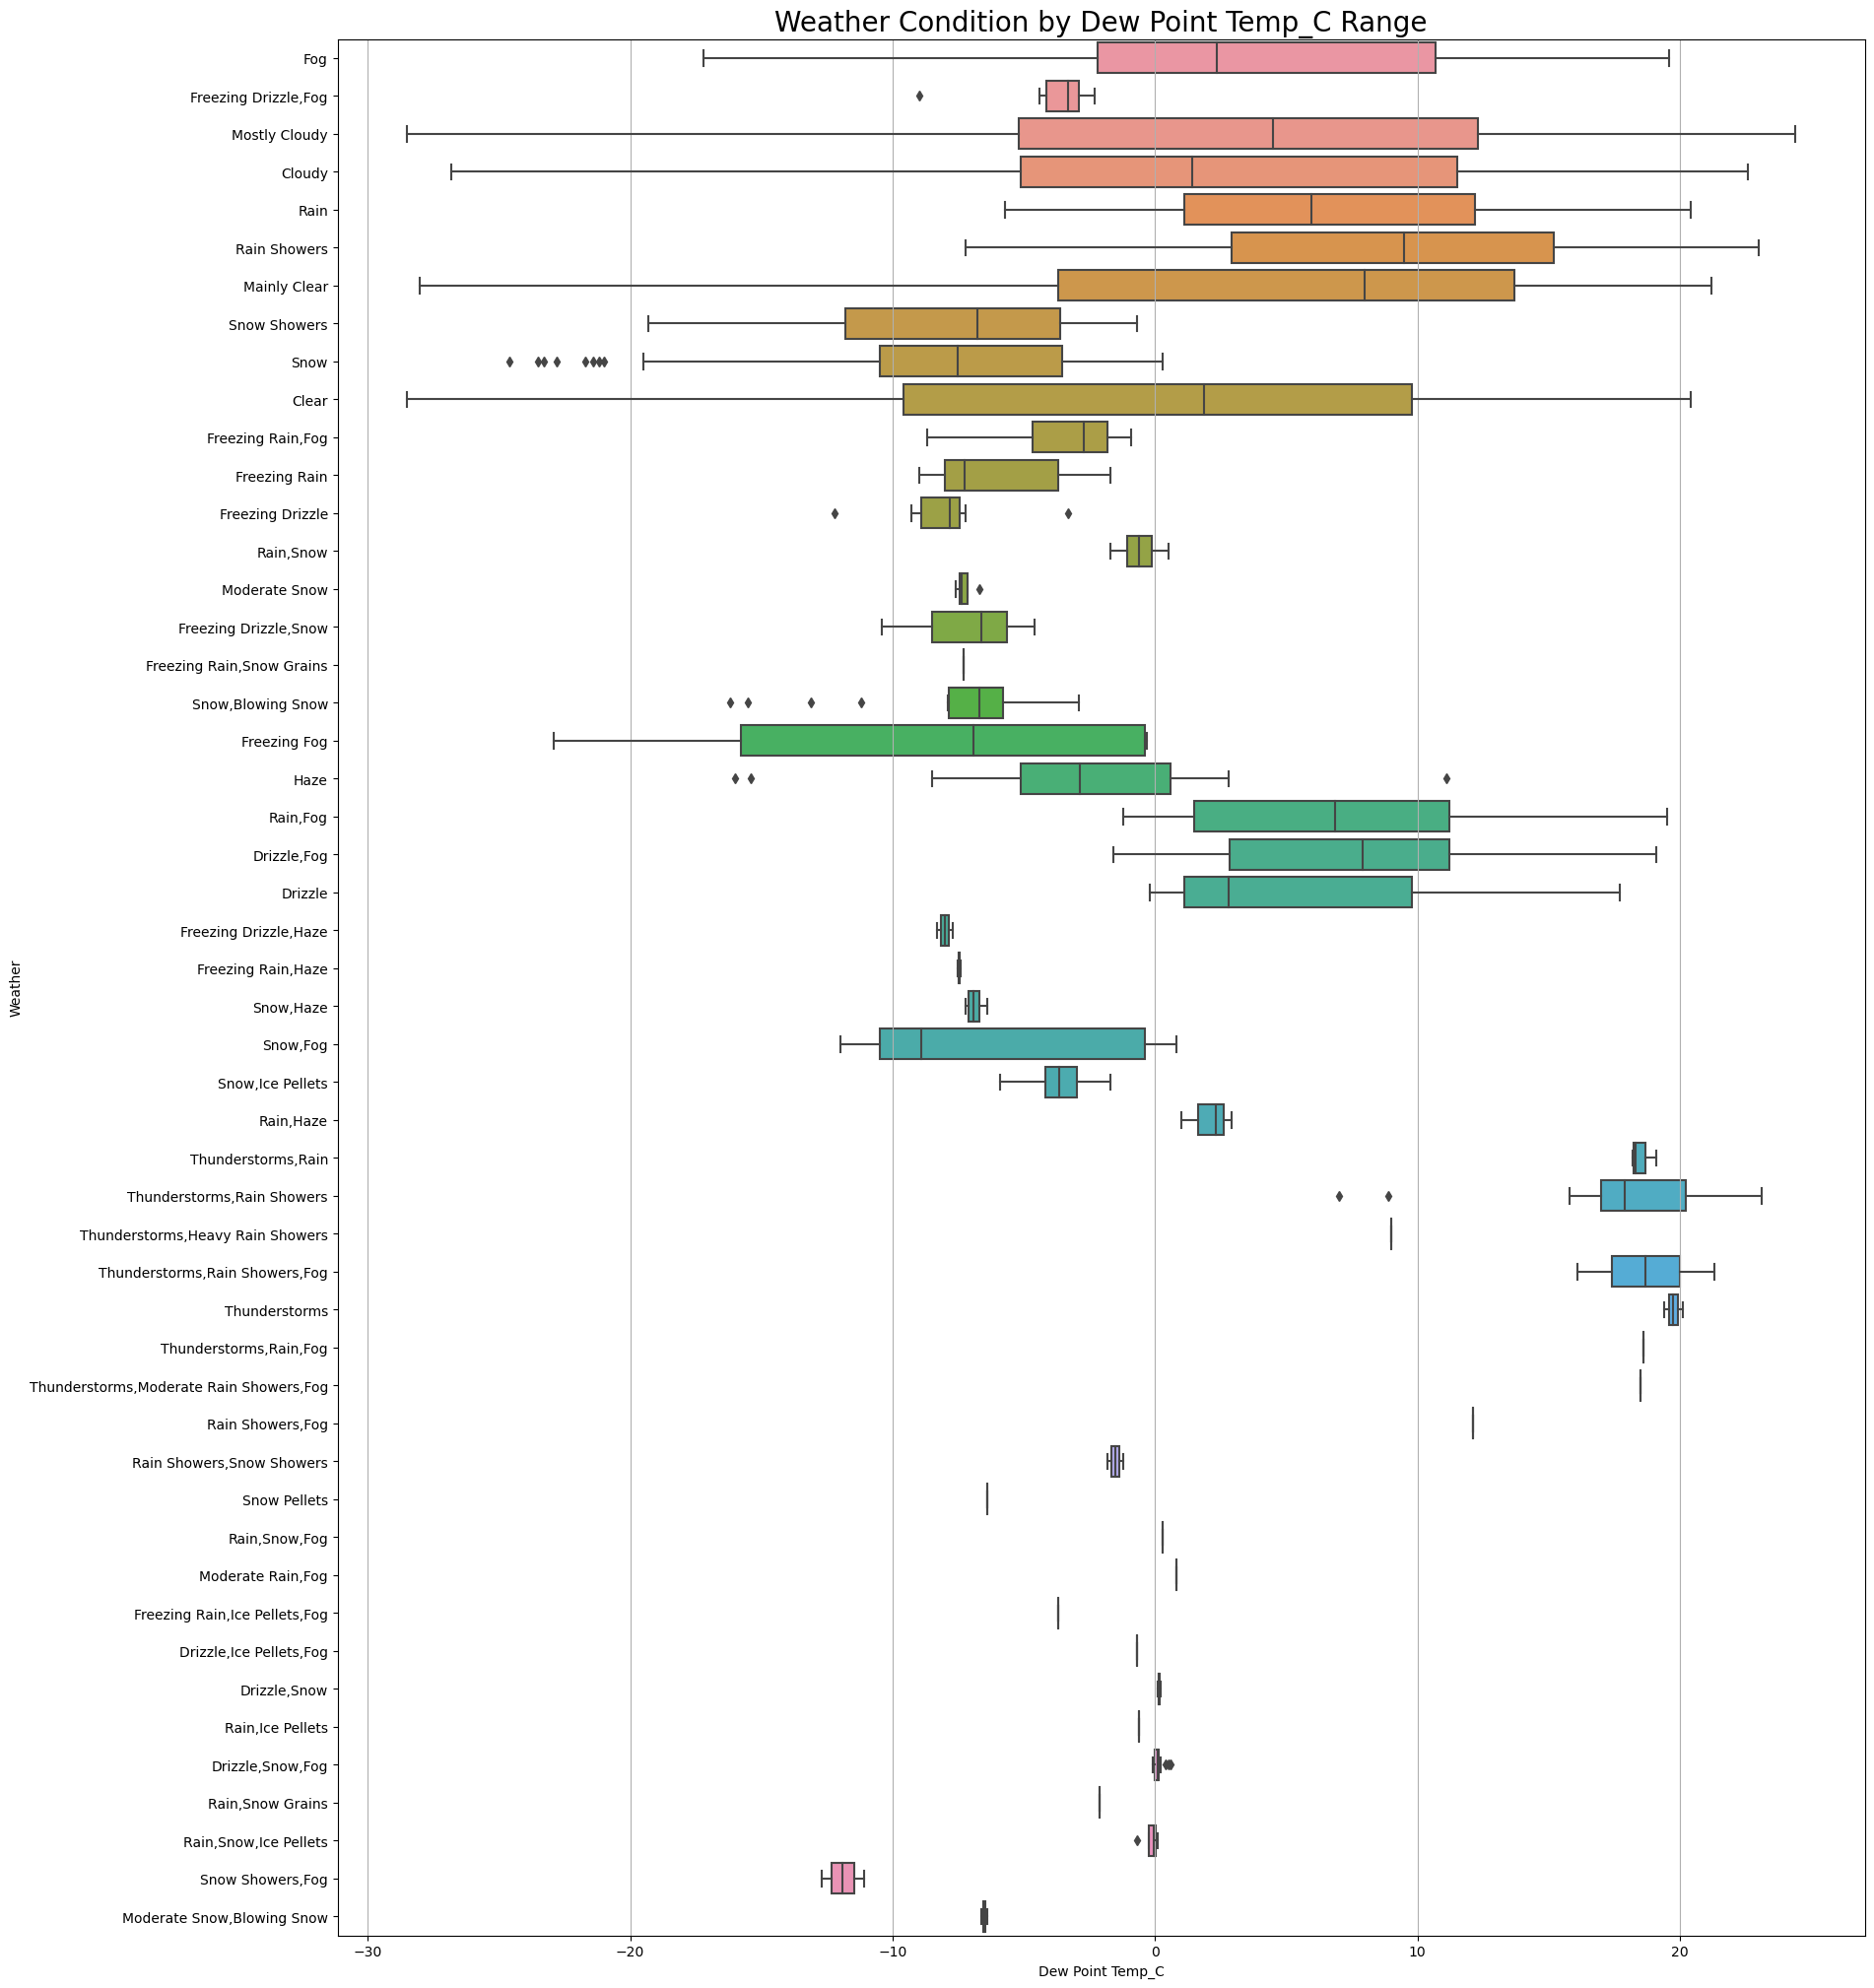

In [79]:
plt.figure(figsize=(20, 25))
plt.grid(True)
sns.boxplot(data=weather, x='Dew Point Temp_C', y='Weather')
plt.title('Weather Condition by Dew Point Temp_C Range', fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Weather Condition by Rel Hum_% Range')

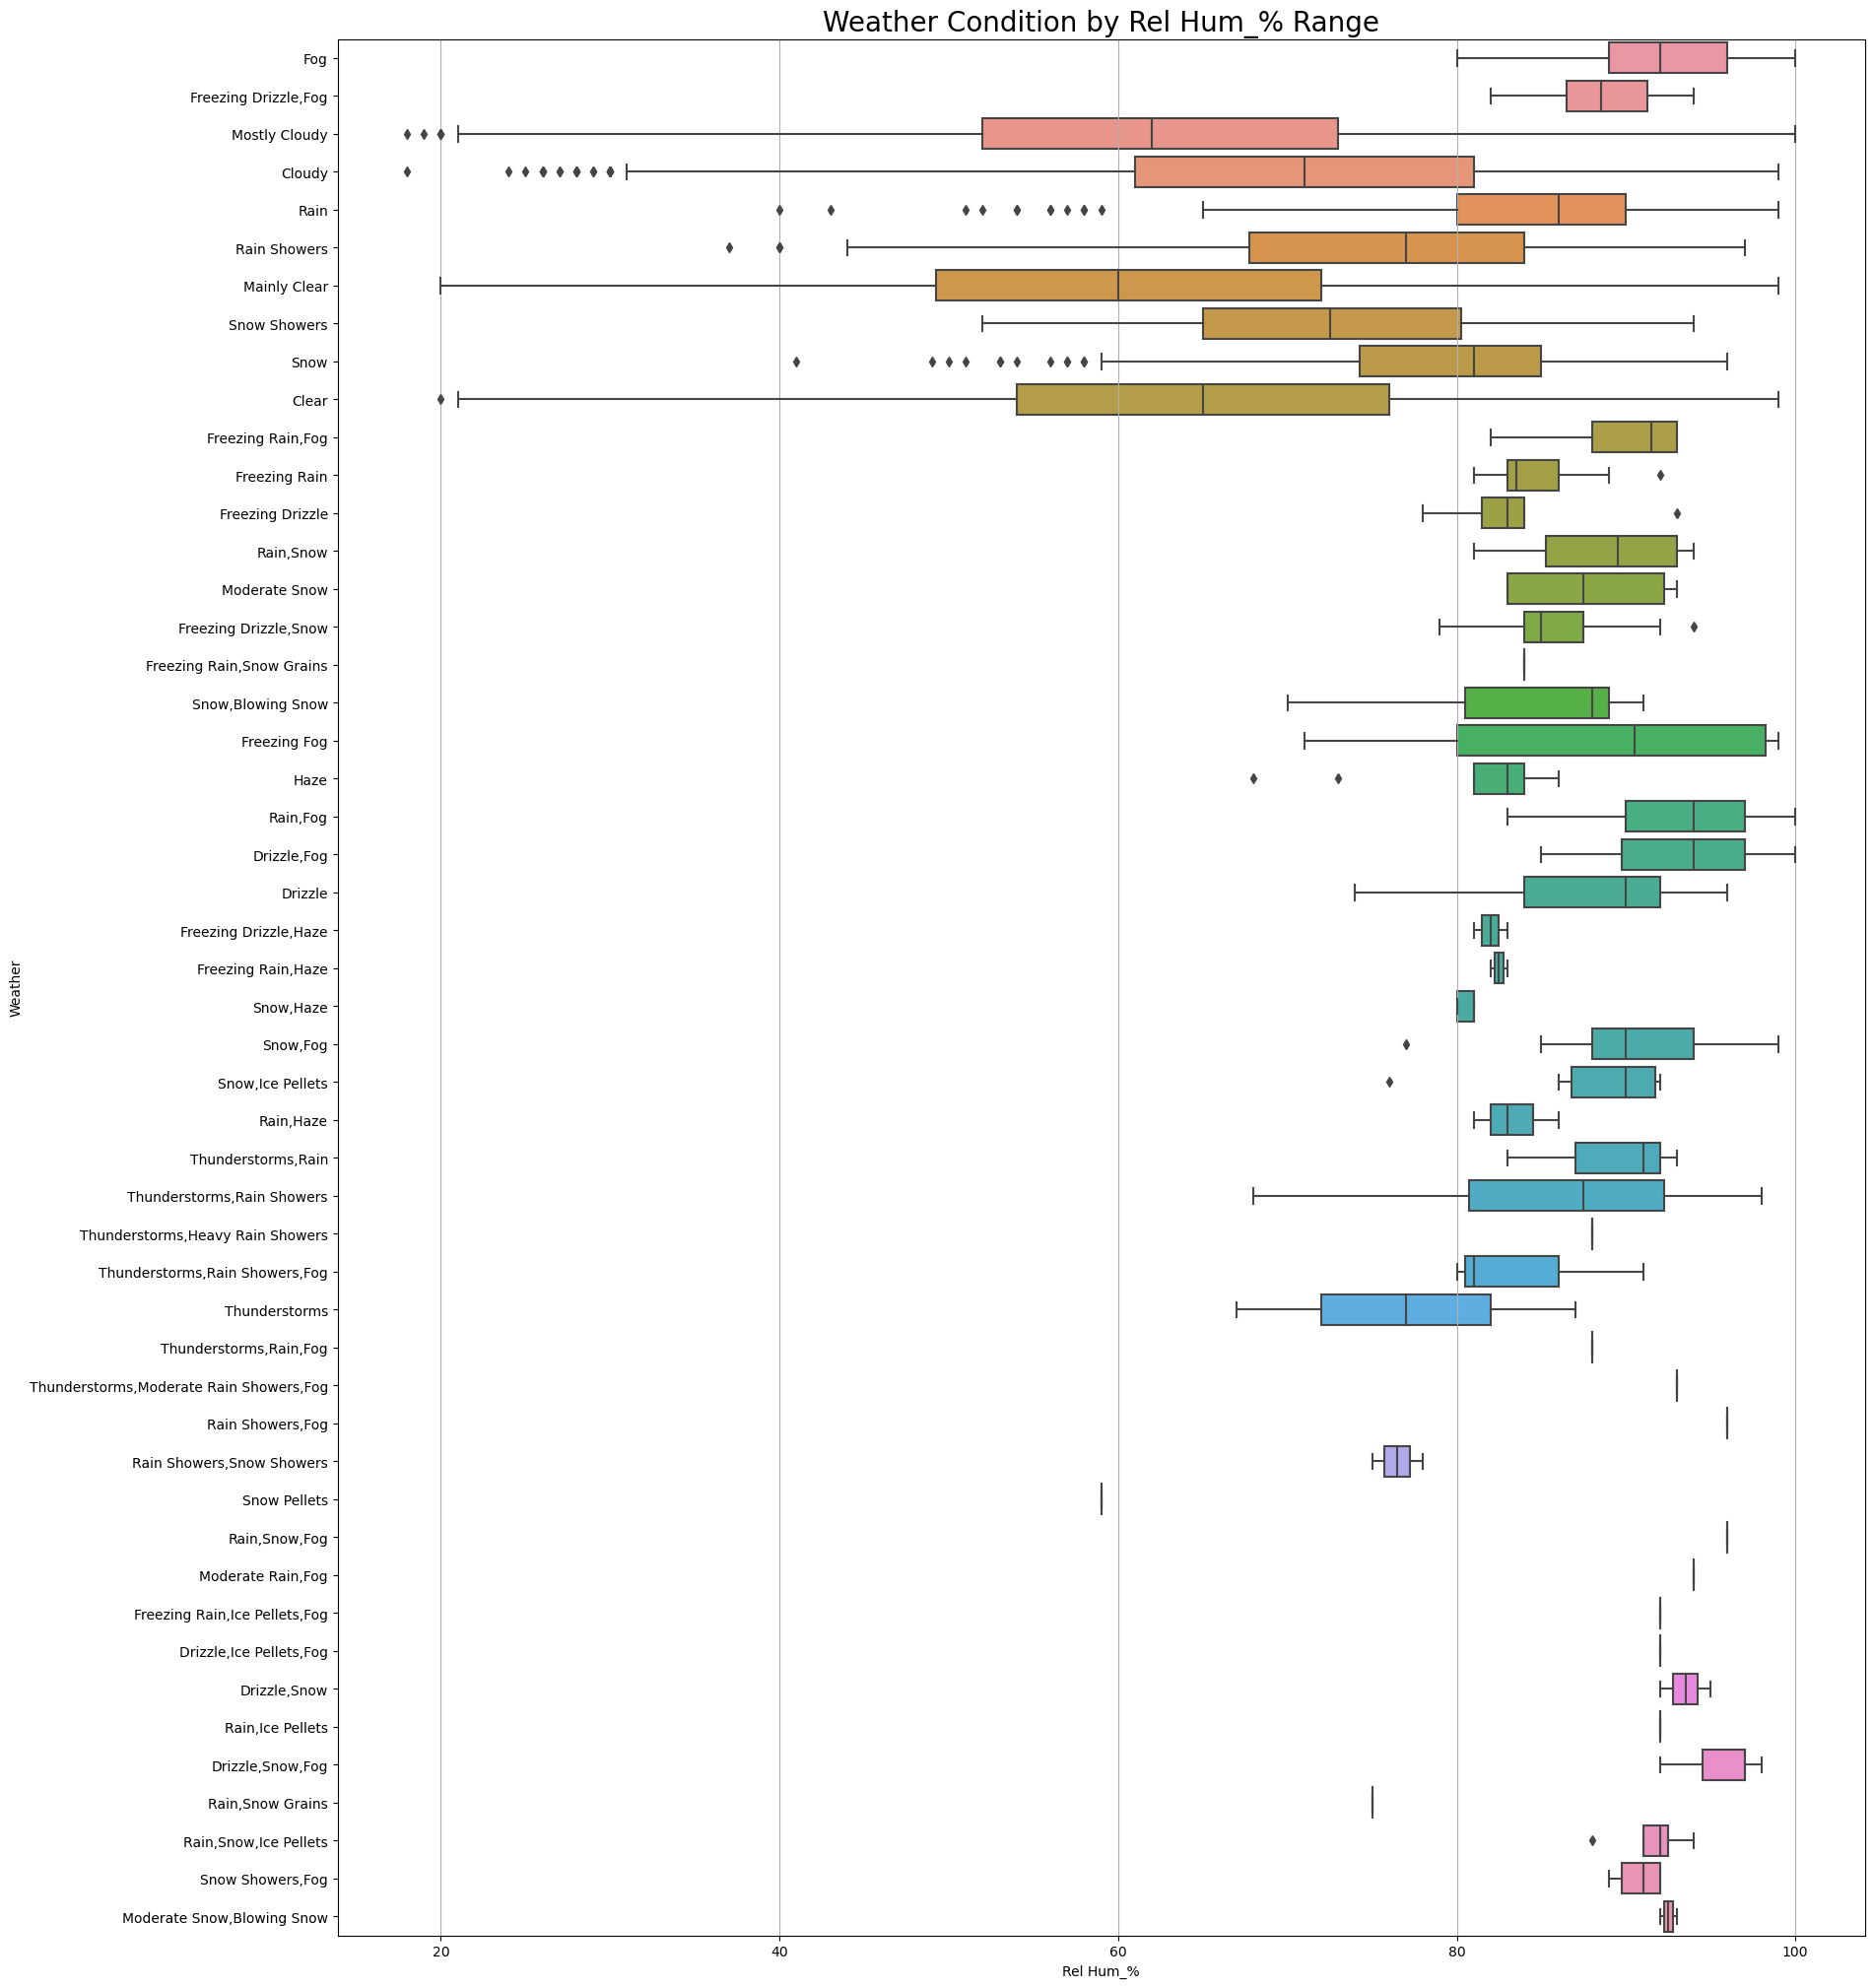

In [84]:
plt.figure(figsize=(20, 25))
plt.grid(True)
sns.boxplot(data=weather, x='Rel Hum_%', y='Weather')
plt.title('Weather Condition by Rel Hum_% Range', fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Weather Condition by Wind Speed_km/h Range')

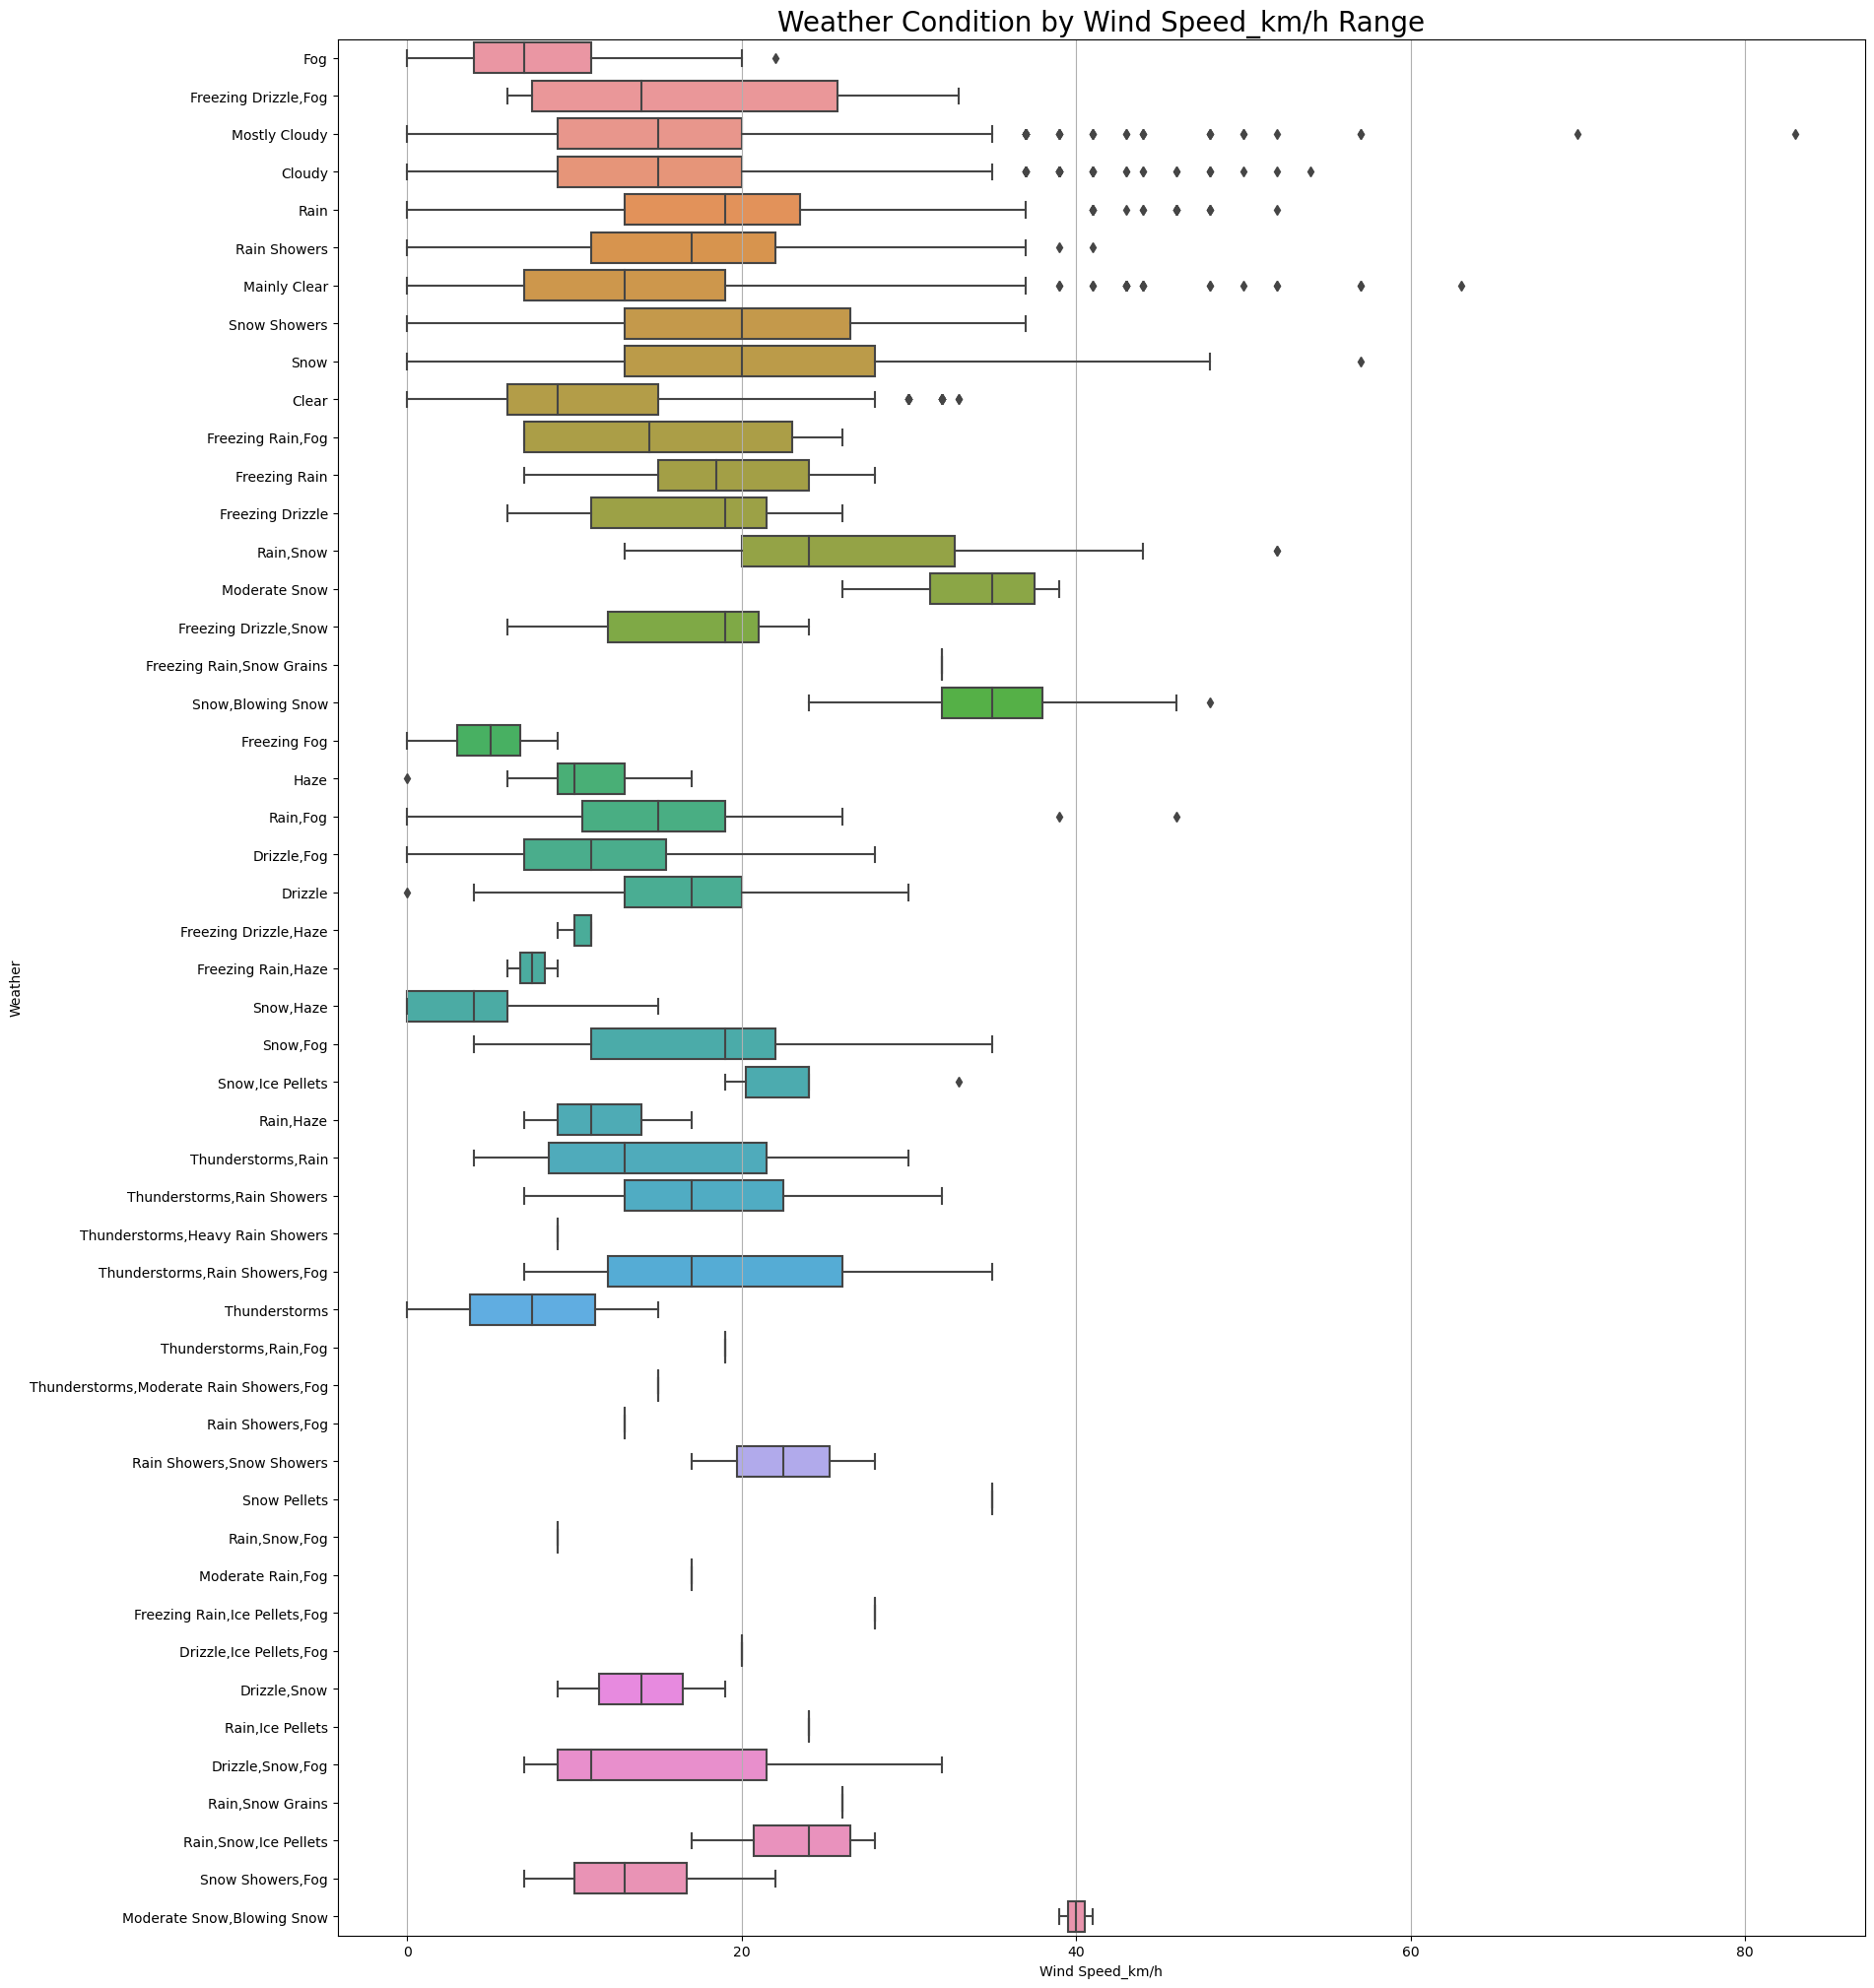

In [85]:
plt.figure(figsize=(20, 25))
plt.grid(True)
sns.boxplot(data=weather, x='Wind Speed_km/h', y='Weather')
plt.title('Weather Condition by Wind Speed_km/h Range', fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Weather Condition by Visibility_km Range')

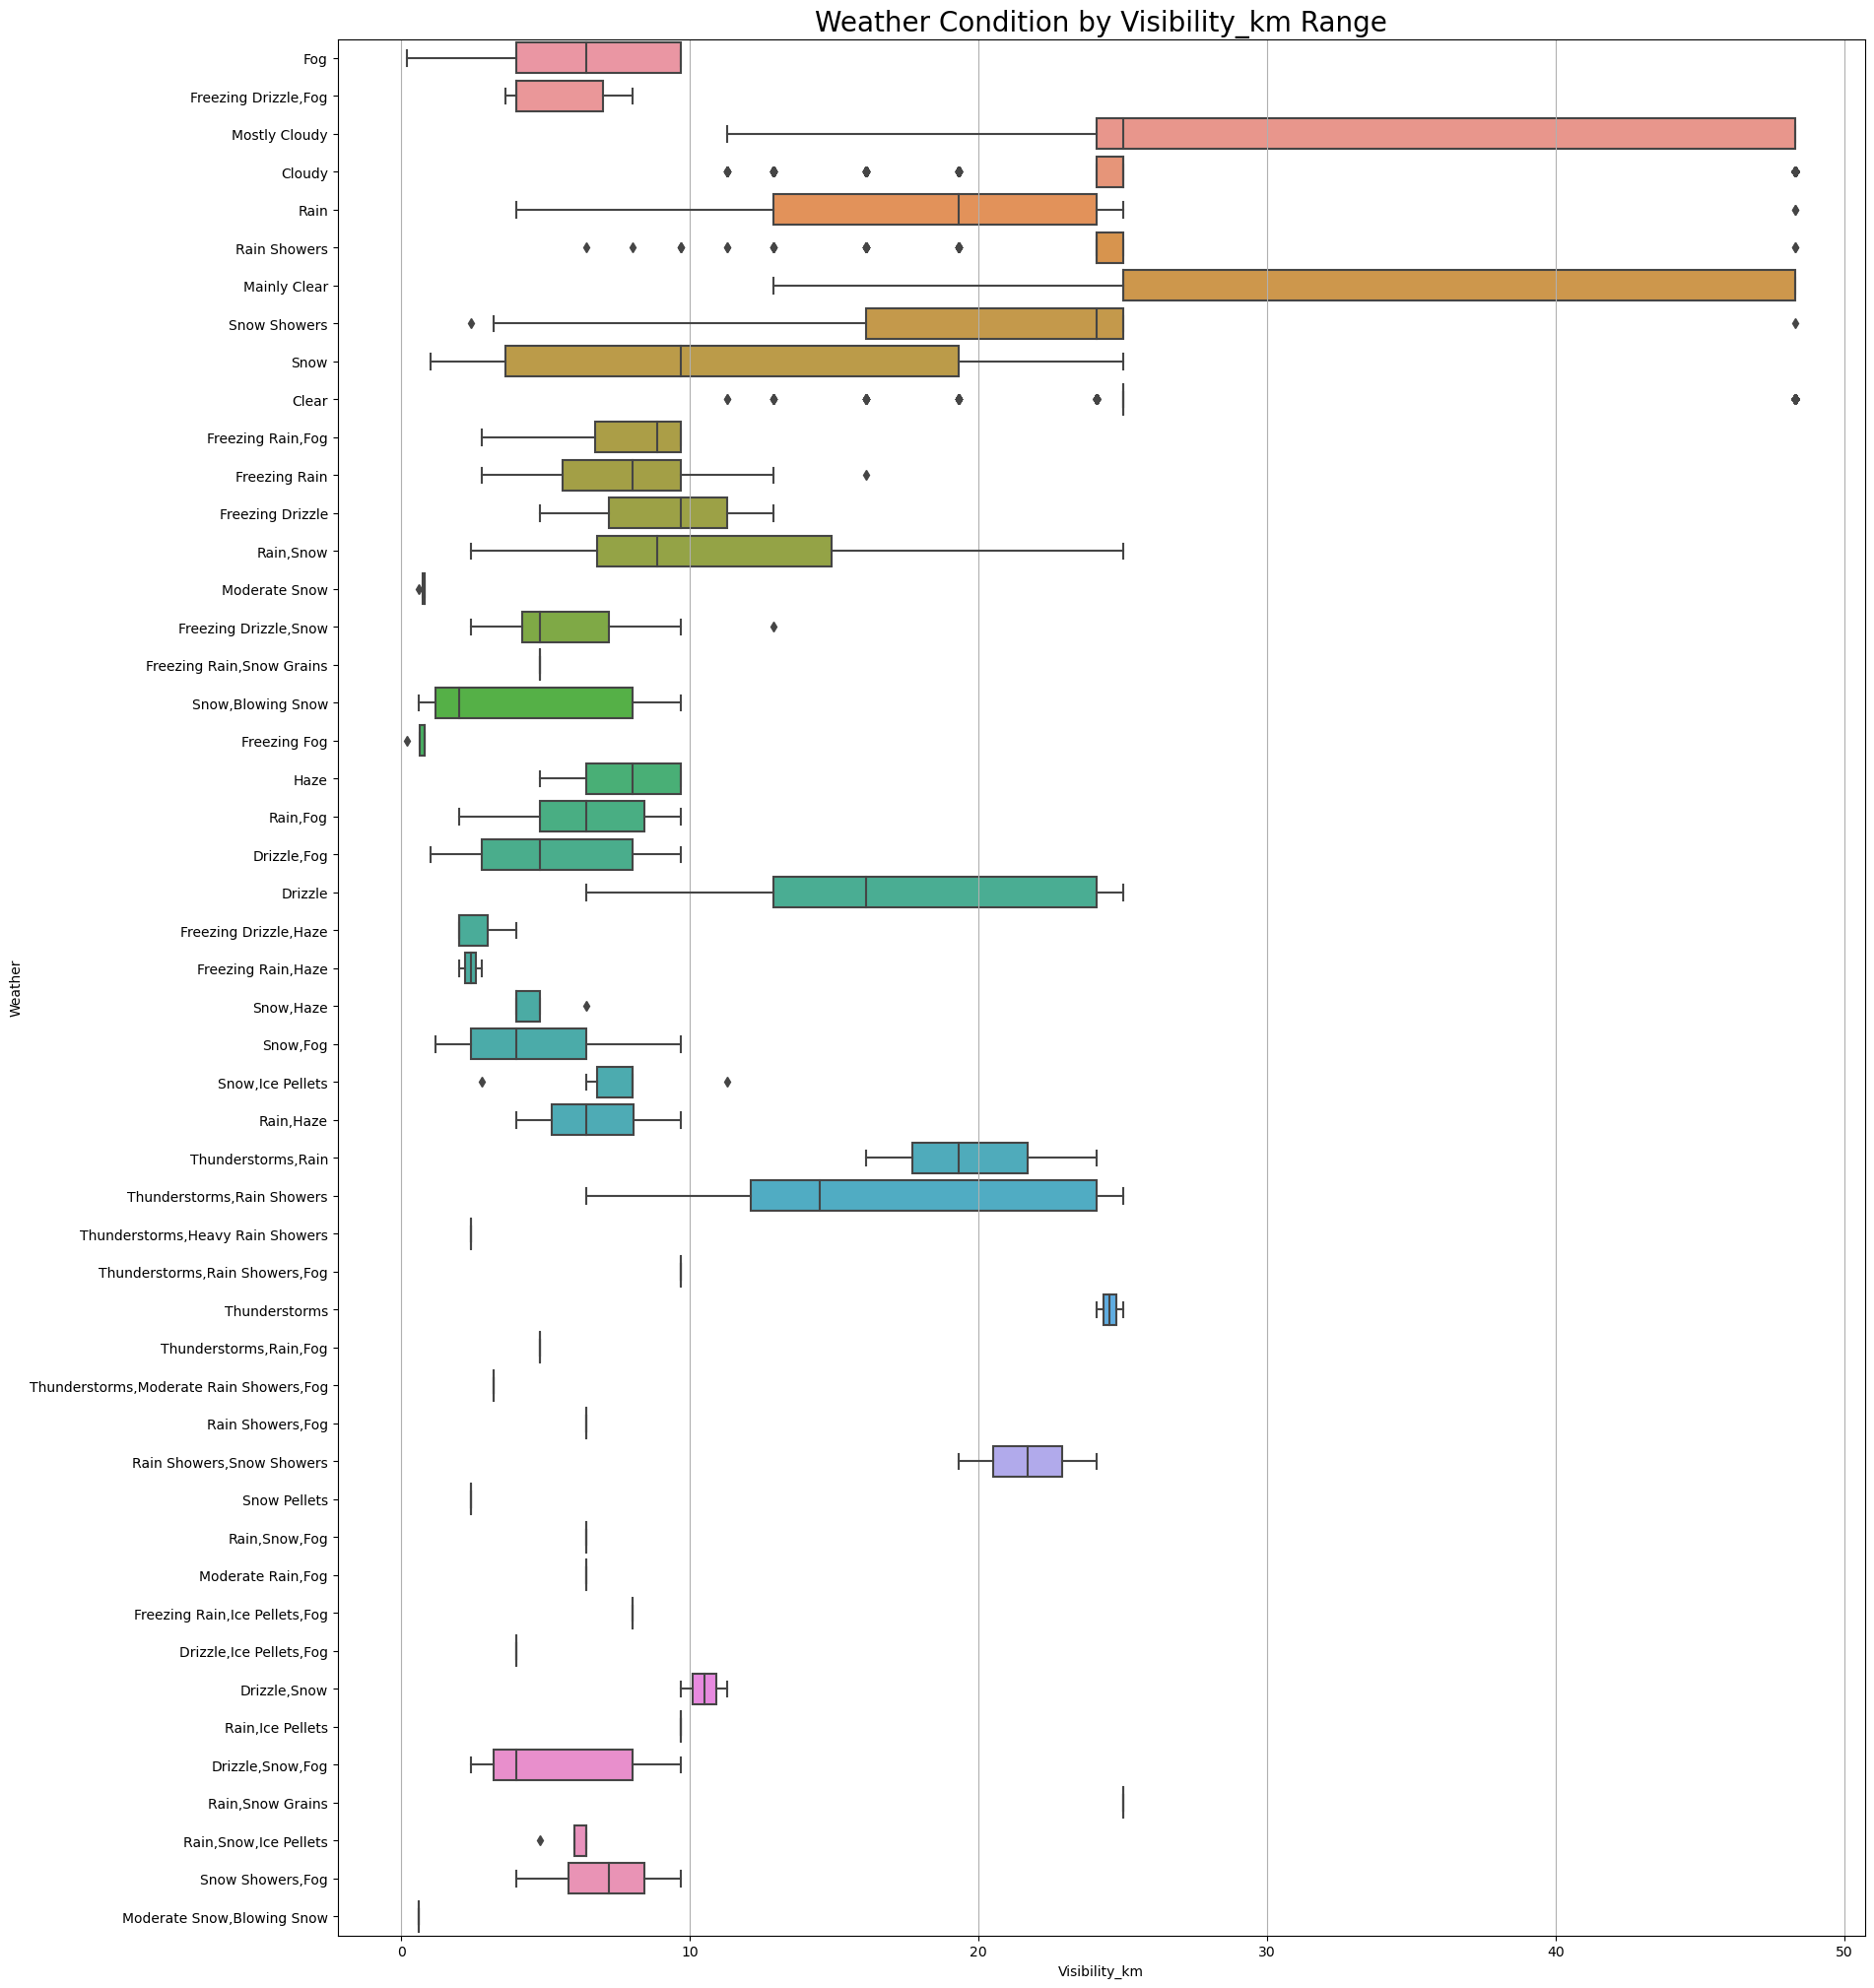

In [86]:
plt.figure(figsize=(20, 25))
plt.grid(True)
sns.boxplot(data=weather, x='Visibility_km', y='Weather')
plt.title('Weather Condition by Visibility_km Range', fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Weather Condition by Press_kPa Range')

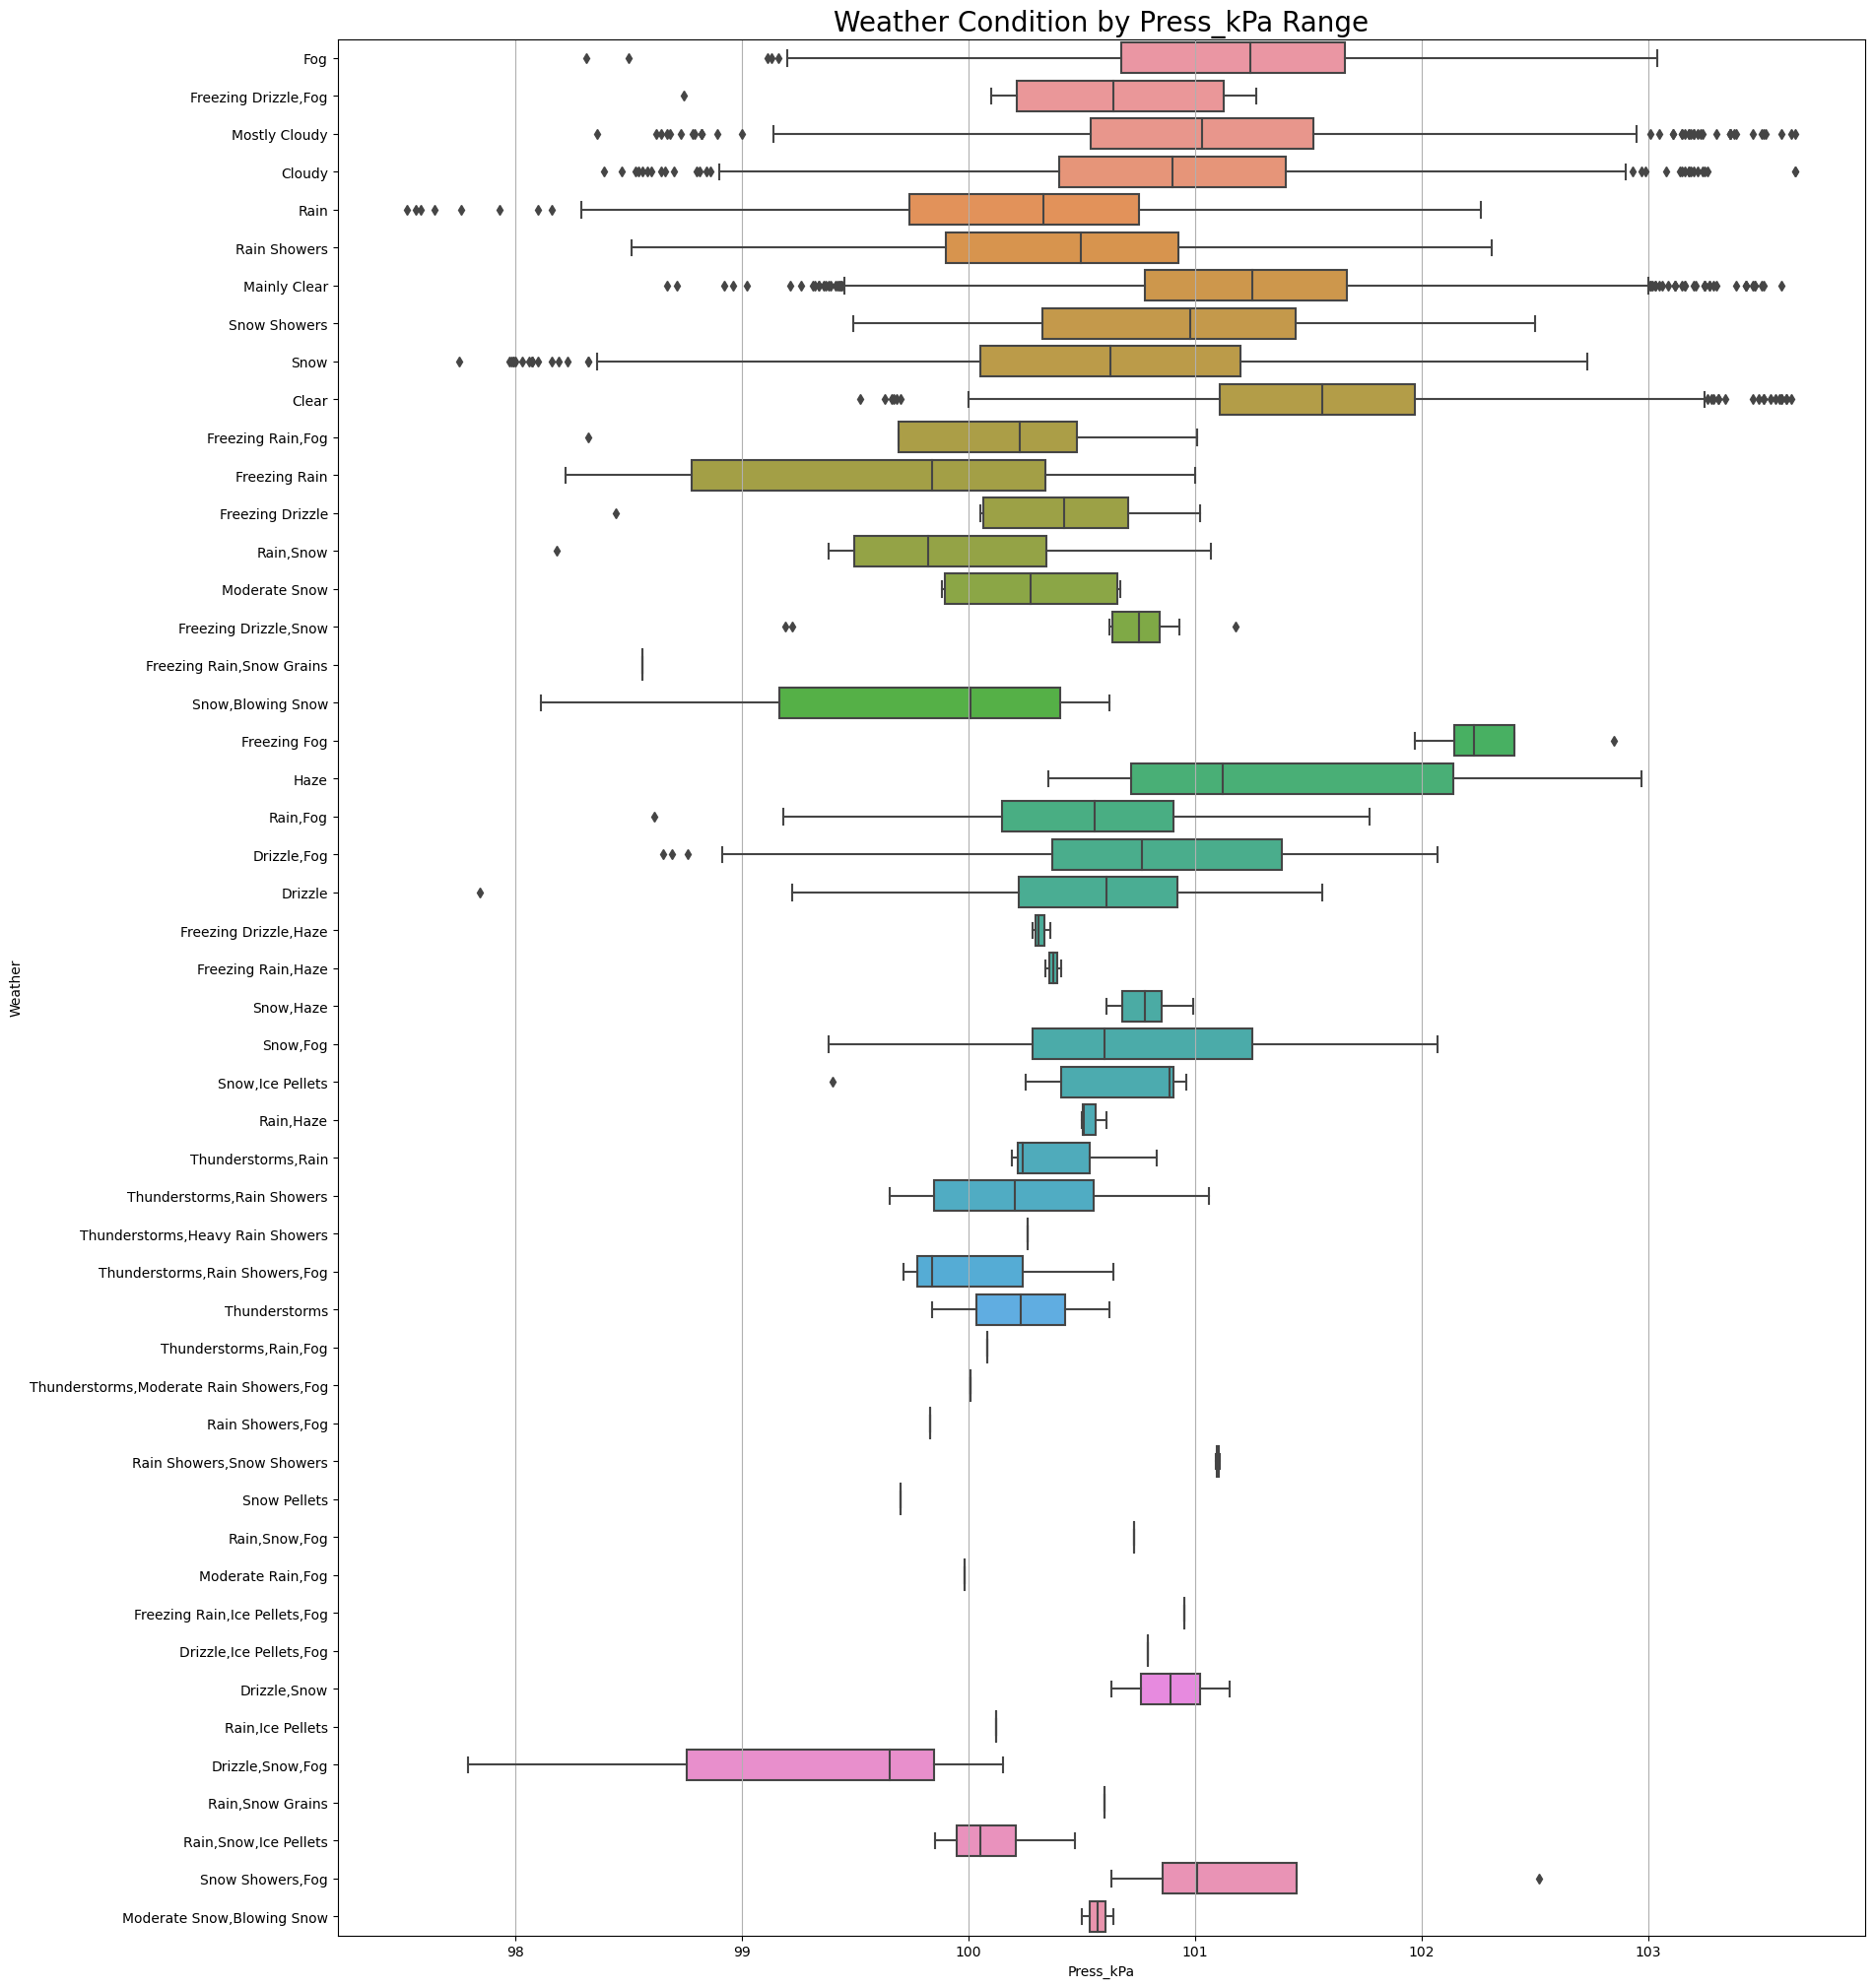

In [87]:
plt.figure(figsize=(20, 25))
plt.grid(True)
sns.boxplot(data=weather, x='Press_kPa', y='Weather')
plt.title('Weather Condition by Press_kPa Range', fontdict={'fontsize': 20})

In [89]:
weather.to_csv('modified_data.csv')